<a href="https://colab.research.google.com/github/Srishti2703/Srishti-Chandra_Projects/blob/main/McDonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.tree import DecisionTreeClassifier
from statsmodels.api import Logit

In [10]:
# URL of the dataset
url = 'https://drive.google.com/uc?id=1hzOveJho24su8n-nfIeYXGFbTflRL7Gy'

# Load the dataset
mcdonalds = pd.read_csv(url)

In [11]:
# View dimensions of the dataset
print(mcdonalds.shape)

(1453, 15)


In [12]:
# View the first 3 rows
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [13]:
# Convert to matrix and encode "Yes" as 1, "No" as 0
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

<ipython-input-13-bc20bc1e91e7>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)


In [14]:
# Calculate column means
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

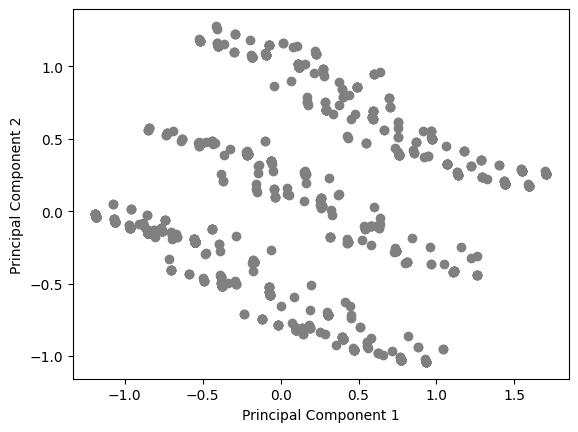

In [15]:
# Principal Component Analysis
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA
print(MD_pca.explained_variance_ratio_)
print(MD_pca.components_)

# Plot PCA projection
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

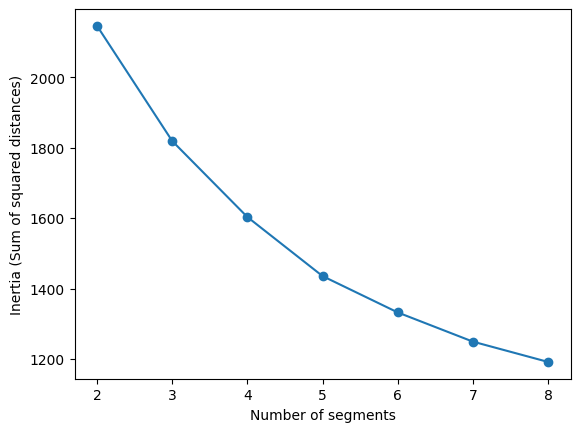

In [16]:
# KMeans Clustering (from 2 to 8 clusters)
np.random.seed(1234)
kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)]

# Plot the results of k-means clustering
kmeans_scores = [model.inertia_ for model in kmeans_models]
plt.plot(range(2, 9), kmeans_scores, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Inertia (Sum of squared distances)')
plt.show()

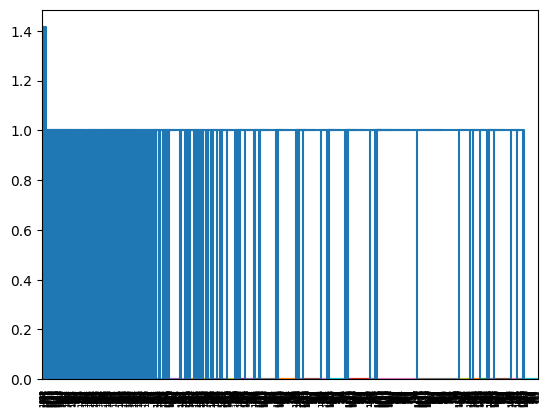

In [17]:
# Hierarchical clustering
from scipy.spatial.distance import pdist

# Calculate pairwise distances between data points
pairwise_distances = pdist(MD_x)

# Perform hierarchical clustering
hclust = linkage(pairwise_distances)

# Plot the dendrogram
dendrogram(hclust)
plt.show()

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


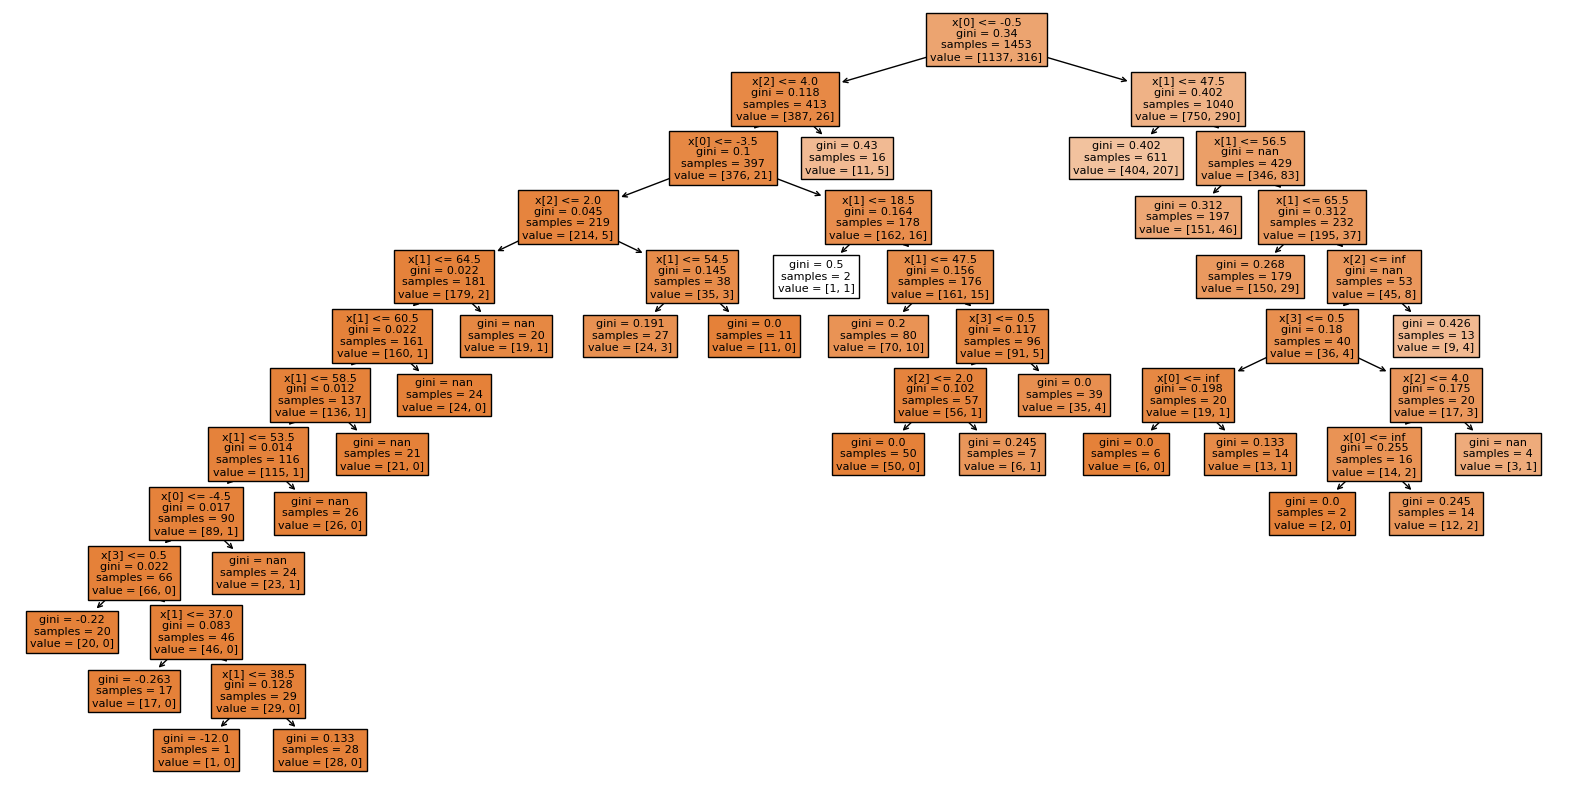

In [18]:
# Decision Tree for classification
X = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']].dropna()

# Convert 'VisitFrequency' to numerical representation
visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Few times a year': 2,
    'Once a month': 3,
    'More than once a month': 4,
    'Once a week': 5,
    'More than once a week': 6,
    'Every day': 7
}
X['VisitFrequency'] = X['VisitFrequency'].map(visit_freq_mapping)

# Convert 'Gender' to numerical representation
gender_mapping = {'Female': 0, 'Male': 1}
X['Gender'] = X['Gender'].map(gender_mapping)

# Investigate and convert 'Like' column
print(X['Like'].unique()) # Print unique values to determine encoding strategy

# Example encoding (replace with appropriate mapping based on unique values)
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I love it!+5': 5
}
X['Like'] = X['Like'].map(like_mapping)

y = (kmeans_models[2].labels_ == 3).astype(int)
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Plot the decision tree
from sklearn import tree as sktree
plt.figure(figsize=(20,10))
sktree.plot_tree(tree, filled=True)
plt.show()

In [19]:
# Ensure no missing values in X and y for logistic regression
X = X.dropna()
y = y[X.index]        # Align y with X after dropping missing values

Optimization terminated successfully.
         Current function value: 0.370967
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  560
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.08832
Time:                        05:56:19   Log-Likelihood:                -207.74
converged:                       True   LL-Null:                       -227.87
Covariance Type:            nonrobust   LLR p-value:                 9.435e-09
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Like               0.1515      0.048      3.125      0.002       0.056       0.246
Age              

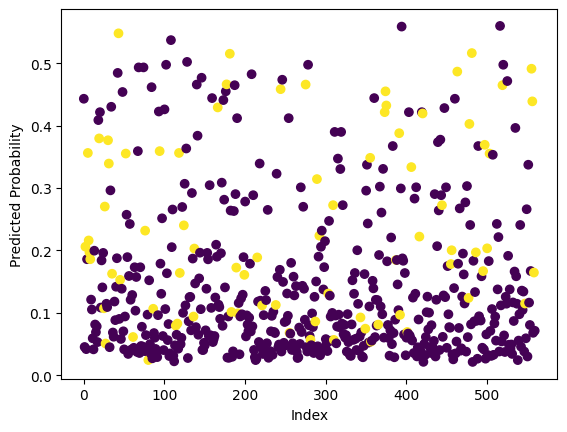

In [20]:
# Logistic Regression model using `statsmodels`
logit_model = Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Summary plots
plt.scatter(np.arange(len(y)), result.predict(), c=y)
plt.xlabel('Index')
plt.ylabel('Predicted Probability')
plt.show()